In [4]:
#Step 0 - Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Machine Learning
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report, confusion_matrix



In [3]:
#Step 1 - Load Data

URL = "https://breathecode.herokuapp.com/asset/internal-link?id=930&path=diabetes.csv"

df_raw = pd.read_csv(URL)

df_raw.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64


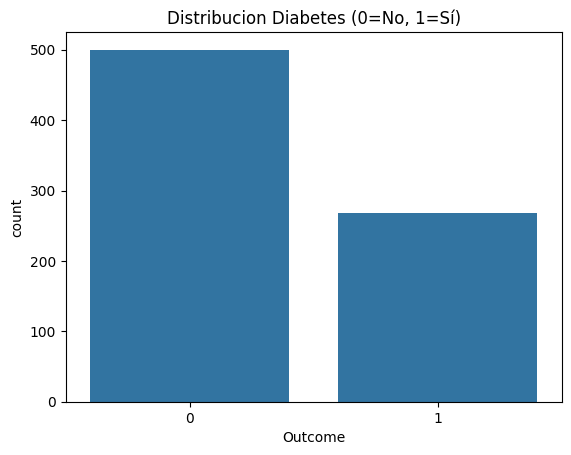

In [12]:
print(df_raw["Outcome"].value_counts(normalize=True))

sns.countplot(x="Outcome", data=df_raw)
plt.title("Distribucion Diabetes (0=No, 1=Sí)")
plt.show()

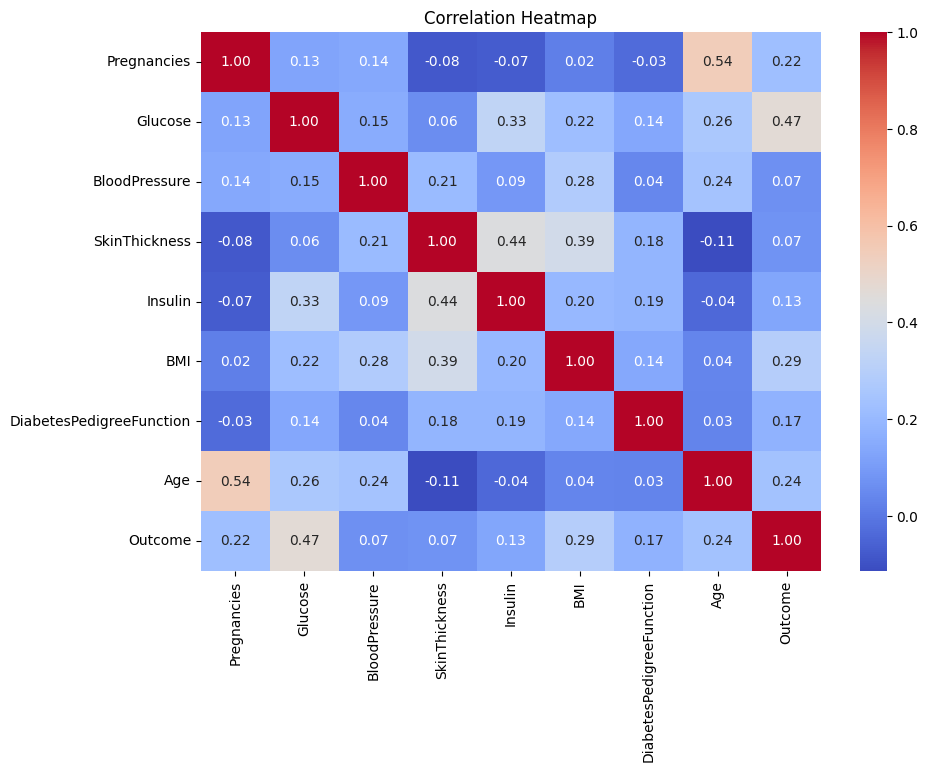

In [13]:
#Análisis de Correlación

plt.figure(figsize=(10,7))
correlation_matriz = df_raw.corr()

sns.heatmap(correlation_matriz, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
#Step 3 - EDA

X = df_raw.drop("Outcome", axis=1)
y = df_raw["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2025)

X_train.shape, X_train.shape

((614, 8), (614, 8))

In [21]:
#Step 4 - ML 

model_gini = DecisionTreeClassifier(random_state=2025, criterion="gini")
model_entropy = DecisionTreeClassifier(random_state=2025, criterion="entropy")

model_gini.fit(X_train, y_train)
model_entropy.fit(X_train, y_train)

y_predict_gini = model_gini.predict(X_test)
y_predict_entropy = model_entropy.predict(X_test)

acc_gini = accuracy_score(y_test, y_predict_gini)
acc_entropy = accuracy_score(y_test, y_predict_entropy)

print(f"Accuracy with Gini: {acc_gini * 100:.2f}%")
print(f"Accuracy with Entropy: {acc_entropy * 100:.2f}%")

Accuracy with Gini: 72.73%
Accuracy with Entropy: 73.38%


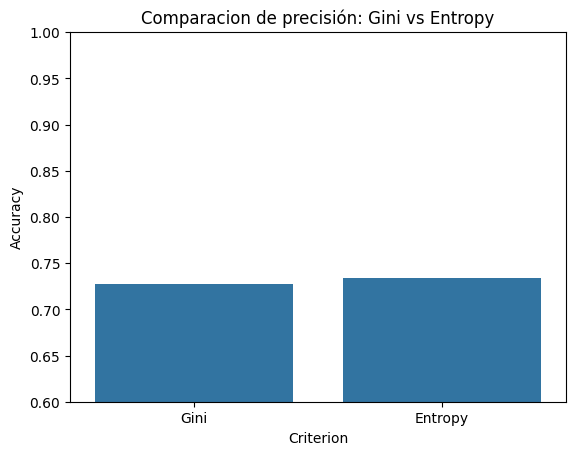

In [22]:
#Grafica

metrics_data = pd.DataFrame({
    "Criterion": ["Gini", "Entropy"],
    "Accuracy": [acc_gini, acc_entropy]

})

sns.barplot(x="Criterion", y="Accuracy", data=metrics_data)
plt.title("Comparacion de precisión: Gini vs Entropy")
plt.ylim(0.6, 1.0)
plt.show()

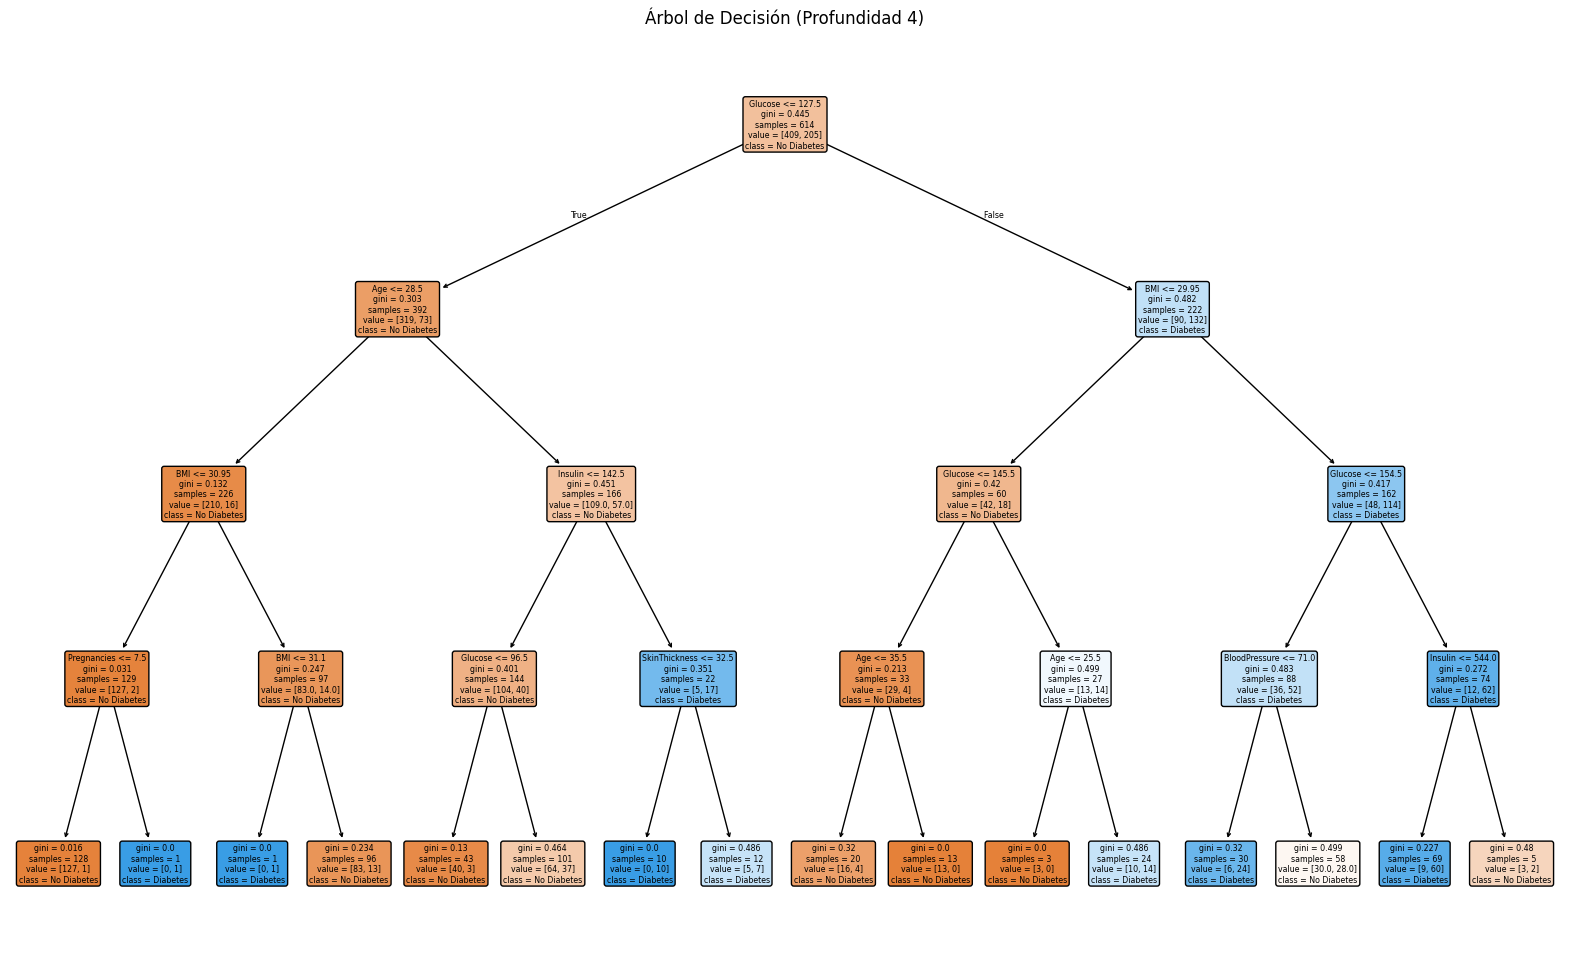

In [28]:
readable_tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
readable_tree.fit(X_train, y_train)

plt.figure(figsize=(20, 12))
plot_tree(readable_tree, 
           filled=True, 
           feature_names=X.columns, 
           class_names=['No Diabetes', 'Diabetes'],
           rounded=True)
plt.title("Árbol de Decisión (Profundidad 4)")
plt.show()

In [34]:
base_model = DecisionTreeClassifier(random_state=2025)

param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 4, 5, 6, 7, 8, 10],
    "min_samples_leaf": [1,3,5,10],
    "min_samples_split": [2,4,10,15]
}


In [35]:
grid_search = GridSearchCV(estimator=base_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring="accuracy",
                           n_jobs=-1
                           )


In [36]:
grid_search.fit(X_train, y_train)

,estimator,DecisionTreeC...om_state=2025)
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [3, 4, ...], 'min_samples_leaf': [1, 3, ...], 'min_samples_split': [2, 4, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


In [37]:
print(f"best hiperparametros found: {grid_search.best_params_}")
print(f"best precision (accuracy) during cross validation: {grid_search.best_score_ * 100:.2f}%")

best hiperparametros found: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 5, 'min_samples_split': 15}
best precision (accuracy) during cross validation: 76.55%
